In [ ]:
import glob
import pandas as pd

# Get a list of all CSV files in the cryto directory
csv_files = glob.glob('cryto/*.csv')

# Create a dictionary of dataframes
dataframes = {}

for file in csv_files:
    # The key is the file name without the extension and path
    key = file.split('/')[-1].split('.')[0]
    dataframes[key] = pd.read_csv(file)
    
for coin, df in dataframes.items():
    # Get the last market cap value
    last_market_cap = df['Marketcap'].iloc[-1]
    print(f"The market capitalization of {coin} is {last_market_cap}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# List of all CSV files in the cryto directory
files = os.listdir('cryto')

# Create an empty DataFrame to store all data
all_data = pd.DataFrame()

# Loop through each file
for file in files:
    # Read the CSV file
    data = pd.read_csv(f'cryto/{file}')
    
    # Convert the 'Date' column to datetime
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Set the 'Date' column as the index
    data.set_index('Date', inplace=True)
    
    # Add the 'Marketcap' column to the all_data DataFrame with the coin's name as the column name
    all_data[file.split('_')[1].split('.')[0]] = data['Marketcap']

# Plot the data
all_data.plot(figsize=(10, 5))
plt.title('Market Capitalizations Over Time')
plt.ylabel('Market Capitalization')
plt.show()




In [ ]:
def calculate_market_cap(price, total_supply):
    return price * total_supply
price = 0.0793008758477
total_supply = 28310972.1604924
market_cap = calculate_market_cap(price, total_supply)
print(market_cap)

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the dataset
df = pd.read_csv('cryto/coin_Polkadot.csv')

# Select the columns to use as features and target
features = df[['High', 'Low', 'Open', 'Volume']]
target = df['Close']

# Split the dataset into training set and test set
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Create a Linear Regression model
model = LinearRegression()  

# Train the model
model.fit(features_train, target_train)

# Use the model to make predictions
predictions = model.predict(features_test)

# Print the predictions
print(predictions)



In [ ]:
import pandas as pd
import os

# Get all CSV files in the 'crypto' directory
files = [f for f in os.listdir('cryto') if f.endswith('.csv')]

for file in files:
    # Read the CSV file
    df = pd.read_csv(os.path.join('cryto', file))
    
    # Calculate the volatility
    df['Volatility'] = df['High'] - df['Low']
    
    # Print the currency name and its maximum volatility
    print(f"Currency: {df['Name'][0]}, Max Volatility: {df['Volatility'].max()}")

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('cryto/coin_USDCoin.csv', header=None)

# Set column names
df.columns = ['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

# Convert 'Close' column to numeric values, coerce errors to NaN
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Drop rows with NaN 'Close' values
df = df.dropna(subset=['Close'])

# Group by currency and calculate standard deviation of 'Close' prices
stdevs = df.groupby('Name')['Close'].std()

# Sort currencies by stability
stable_currencies = stdevs.sort_values()

# Print the most stable currencies
print(stable_currencies.head())

In [ ]:
import pandas as pd

# Read the CSV files
usd_coin = pd.read_csv('cryto/coin_USDCoin.csv')
tether = pd.read_csv('cryto/coin_Tether.csv')
bitcoin = pd.read_csv('cryto/coin_Bitcoin.csv')

# Extract the closing prices
usd_coin_close = usd_coin['Close']
tether_close = tether['Close']
bitcoin_close = bitcoin['Close']

# Create a DataFrame with the closing prices
df = pd.DataFrame({
    'USD Coin': usd_coin_close,
    'Tether': tether_close,
    'Bitcoin': bitcoin_close
})

# Calculate the correlation
correlation = df.corr()

print(correlation)

In [5]:
import sys
!{sys.executable} -m ensurepip --upgrade

Looking in links: c:\Users\MANJUL~2\AppData\Local\Temp\tmp2_nqhq4g
Processing c:\users\manjul~2\appdata\local\temp\tmp2_nqhq4g\pip-24.0-py3-none-any.whl


In [6]:
%pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
    --------------------------------------- 0.1/9.8 MB 7.5 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/9.8 MB 7.5 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/9.8 MB 6.9 MB/s eta 0:00:02
   ------ --------------------------------- 1.5/9.8 MB 8.2 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/9.8 MB 8.1 MB/s eta 0:00:01
   --------- ------------------------------ 2.2/9.8 MB 8.4 MB/s eta 0:00:01
   ---------- ----------------------------- 2.5/9.8 MB 8.1 MB/s eta 0:00:01
   ----------- ---------------------------- 2.9/9.8 MB 8.1 MB/s eta 0:00:01
   -------------- ------------------------- 3.6/9.8 MB 8.5 MB/s eta 0:00:01
   --------------- ------------------------ 3.9/9.8 MB 8.3 MB/s eta 0:00:01
   ------------------ --------------------- 4.4/9.8 MB 8.4 MB/s eta 0:00:01
   -------------------- ------------------- 4.9/9.8 MB 8.5 MB/s eta 0:00:01
   ----------------

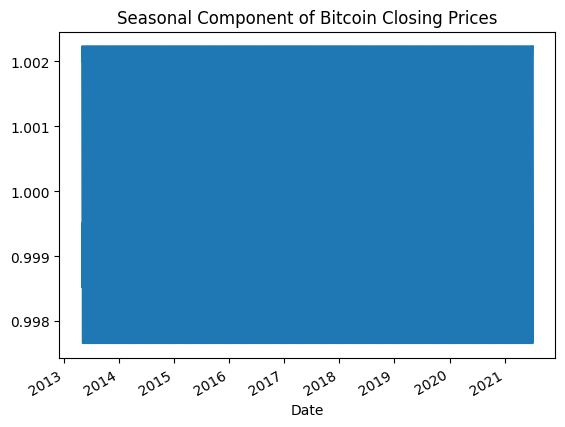

In [7]:

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the data
df = pd.read_csv('cryto/coin_Bitcoin.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Use 'Close' price for analysis
df_close = df['Close']

# Decompose the time series
result = seasonal_decompose(df_close, model='multiplicative')

# Plot the seasonal component
result.seasonal.plot()
plt.title('Seasonal Component of Bitcoin Closing Prices')
plt.show()